In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as mplStyle
mplStyle.use('../../plotStyle.mpl')


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
measCablesTFData = np.loadtxt('../data/MeasurementCablesTFData_20220902_152523_Traces.csv',
                          delimiter=',', comments='%')
DFDCableTFData = np.loadtxt('../data/DFD_DelayLineTFData_20220902_152320_Traces.csv',
                            delimiter=',', comments='%')

In [4]:
ff = np.flip(DFDCableTFData[:, 0])
DFDCableTF = np.flip(10**(DFDCableTFData[:, 1]/20)
                     * np.exp(1j * DFDCableTFData[:, 2] * np.pi / 180))

In [5]:
measCablesTF = np.flip(10**(measCablesTFData[:, 1]/20)
                       * np.exp(1j * measCablesTFData[:, 2] * np.pi / 180))

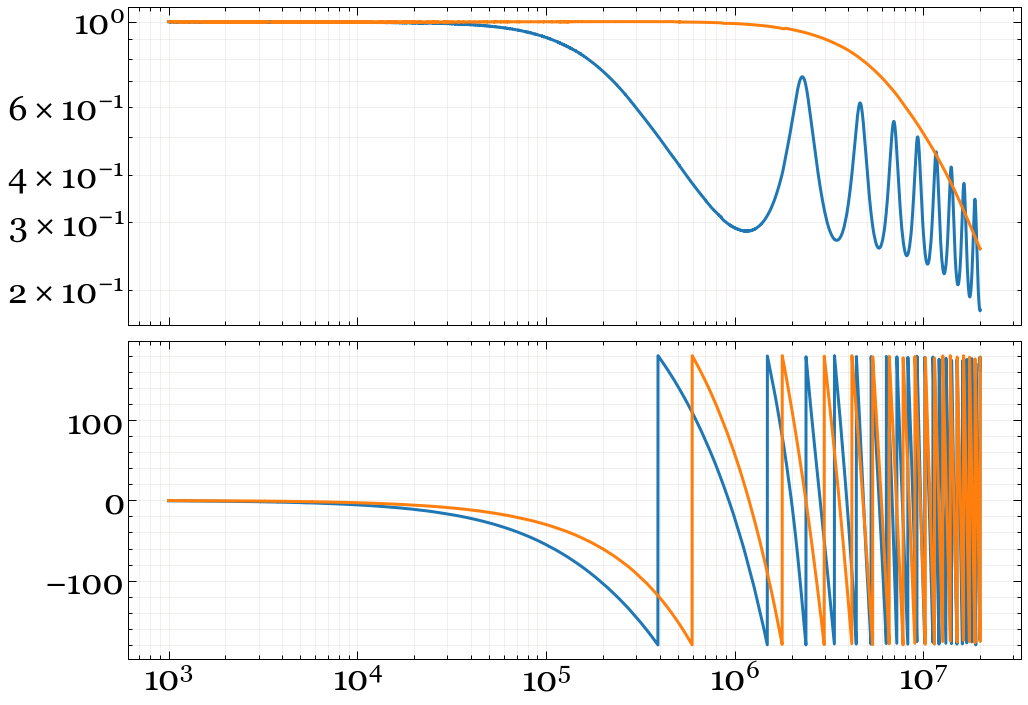

In [6]:
fig, ax = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05})
ax[0].loglog(ff, np.abs(DFDCableTF))
ax[0].loglog(ff, np.abs(measCablesTF))
ax[1].semilogx(ff, np.angle(DFDCableTF, deg=True))
ax[1].semilogx(ff, np.angle(measCablesTF, deg=True))

In [7]:
DFDTF = DFDCableTF / measCablesTF

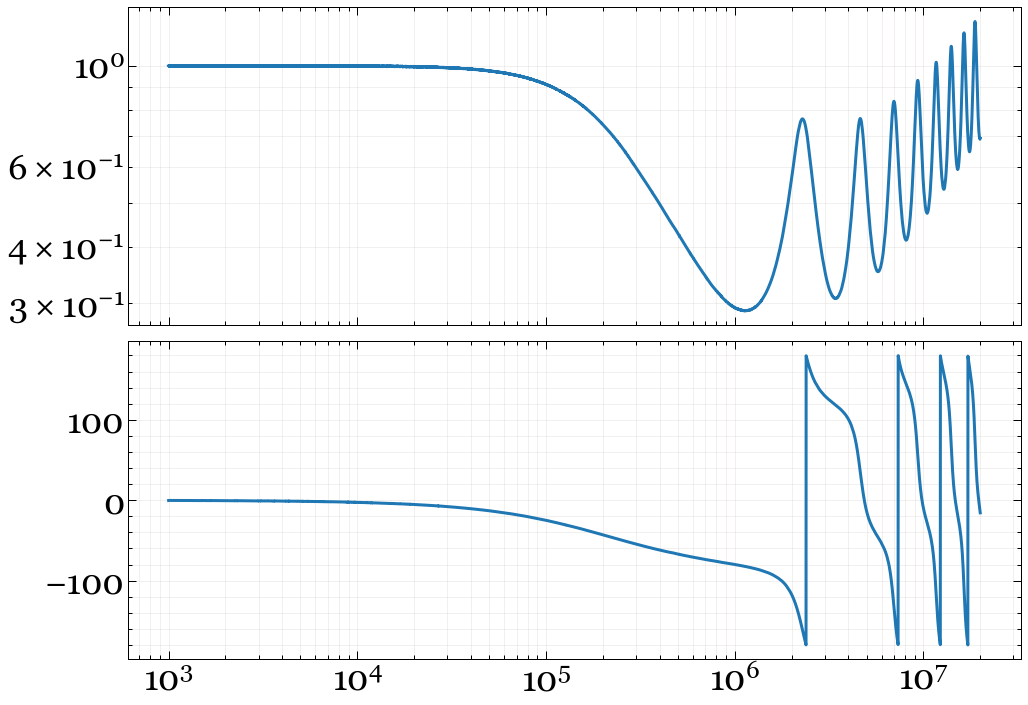

In [8]:
fig, ax = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05})
ax[0].loglog(ff, np.abs(DFDTF))
ax[1].semilogx(ff, np.angle(DFDTF, deg=True))

In [9]:
unwDFDCableTFph = np.unwrap(np.angle(DFDCableTF))
unwMeasCablesTFph = np.unwrap(np.angle(measCablesTF))
unwDFDTFph = np.unwrap(np.angle(DFDTF))

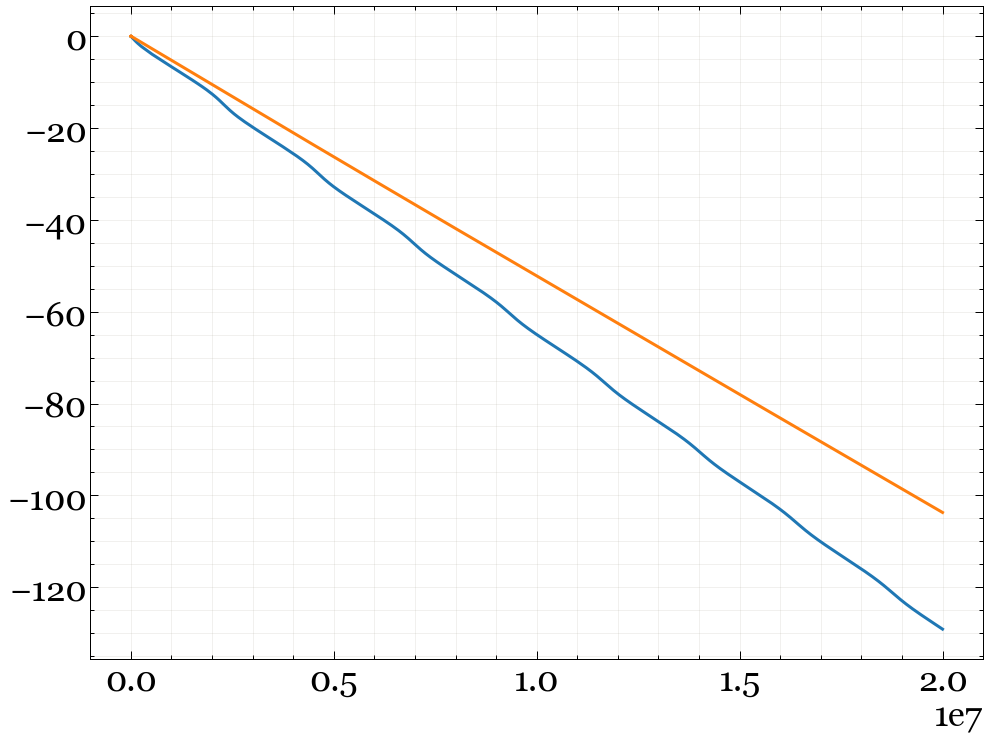

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(ff, unwDFDCableTFph)
ax.plot(ff, unwMeasCablesTFph)

In [11]:
from scipy.optimize import curve_fit
def model(x, m, c):
    return c + m * x
popt, pcov = curve_fit(model, ff, unwDFDTFph, p0=[-4.5/4e6, 0])
fit = model(ff, *popt)
delay = - popt[0] / ( 2 * np.pi)
delay_unc = np.sqrt(pcov[0, 0]) / 2 / np.pi

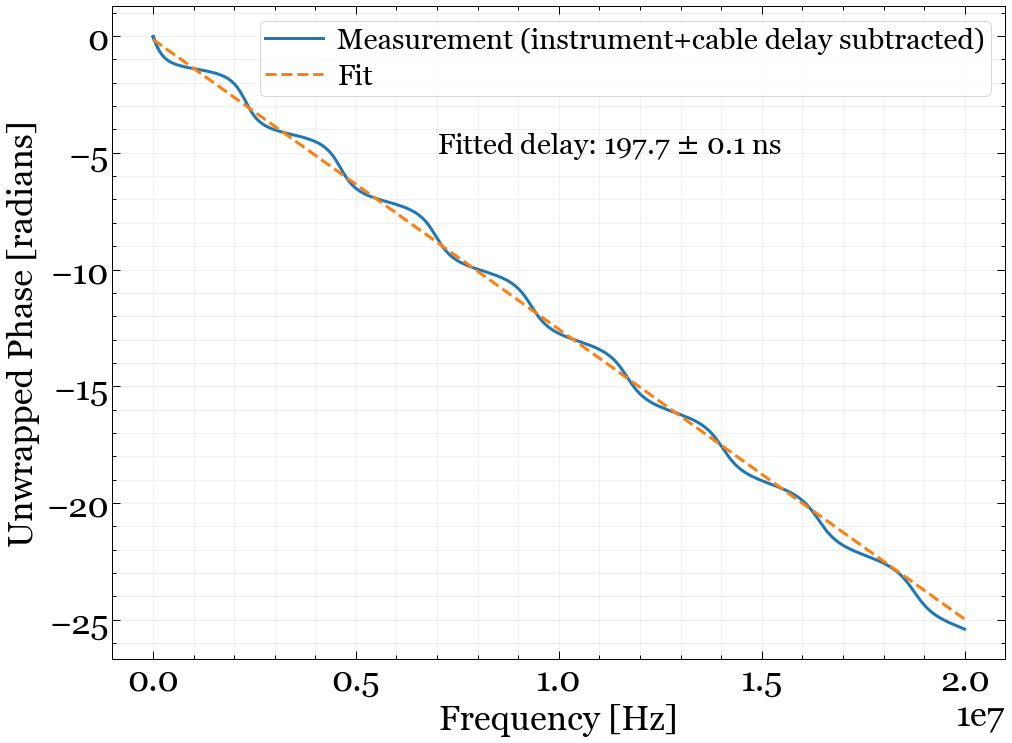

In [13]:
fig, ax = plt.subplots(1, 1, sharex=True, gridspec_kw={'hspace': 0.05})
ax.plot(ff, unwDFDTFph, label='Measurement (instrument+cable delay subtracted)')
ax.plot(ff, fit, label='Fit', ls='--')
ax.set_ylabel('Unwrapped Phase [radians]')
ax.set_xlabel('Frequency [Hz]')
ax.text(0.7e7, -5,
        ('Fitted delay: ' + str(np.round(delay*1e9, 1))
         + r' $\pm$ '
         + str(np.round(delay_unc*1e9,1))
         + ' ns'),
        fontsize='x-large')
ax.legend()
# fig.savefig('../figures/DFDdelay.pdf', bbox_inches='tight')